In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [5]:
# Visualize

def visualize(filename) : 
    with open('{}.txt'.format(filename)) as f : 
        lines = f.read()

    ls = [i.split("\n") for i in lines.split('###################################################################')]
    ls = [j for i in ls for j in i if j]

    Training_loss = [float(re.findall('\d[.]\d{,4}',i)[0]) for i in ls if "Training loss" in i]
    Training_accuracy = [float(re.findall('\d[.]\d{,4}',i)[0]) for i in ls if "Training accuracy" in i]
    
    Validation_loss = [float(re.findall('\d[.]\d{,4}',i)[0]) for i in ls if "Validation loss" in i]
    Validation_accuracy = [float(re.findall('\d[.]\d{,4}',i)[0]) for i in ls if "Validation accuracy" in i]

    return Training_accuracy, Validation_accuracy

17 17 17


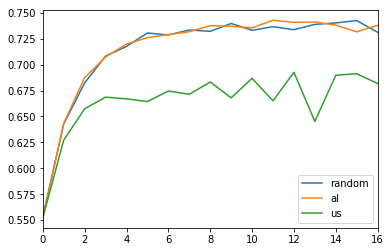

In [7]:
random_train_acc, random_val_acc = visualize('log/random_sampling')
al_train_acc, al_val_acc = visualize('log/k=1000,beta=10')
us_train_acc, us_val_acc = visualize('log/uncertainty_sampling')

print(len(random_val_acc),len(al_val_acc),len(us_val_acc))
df=pd.DataFrame()
df['random'] = random_val_acc
df['al'] = al_val_acc
df['us'] = us_val_acc

df.plot()